# EDA

In [2]:
import pandas as pd
import numpy as np
import re
import sidetable
from scipy import stats
import math
import pickle
pd.options.display.max_columns = None

from Levenshtein import distance # Dandole unos modelos, te compara una columna y te devuelve los valores de esta transformados al mas parecido del modelo.

#librerias limpieza de nulos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Normalizacion
from sklearn.preprocessing import MinMaxScaler


#Estandarización
## esto es un metodo que estandariza automaticamente todas las columnas del dataframe que le pasemos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#Normalizacion
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder



#libreria para el balanceo
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# librerías de visualización
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from xgboost import XGBRegressor
from  sklearn.ensemble import GradientBoostingRegressor


# para calcular las métricas regresion logistica
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("datos/set_limpio_sin0.csv", index_col= False).reset_index()
df.drop(["index","Unnamed: 0"],axis =1, inplace =True)
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long
0,33590,2014.0,Gmc,Sierra 1500,good,8,gas,57923.0,desconocido,4wd,pickup,white,AL,32.590,-85.4800
1,22590,2010.0,Chevrolet,Silverado,good,8,gas,71229.0,desconocido,4wd,pickup,blue,AL,32.590,-85.4800
2,39590,2020.0,Chevrolet,Silverado,good,8,gas,19160.0,desconocido,4wd,pickup,red,AL,32.590,-85.4800
3,30990,2017.0,Toyota,Land Cruiser,good,8,gas,41124.0,desconocido,4wd,pickup,red,AL,32.590,-85.4800
4,15000,2013.0,Ford,F-150,excellent,6,gas,128000.0,automatic,rwd,truck,black,AL,32.592,-85.5189


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,382151.0,19393.013772,15304.138190,500.000000,7900.0000,15980.0000,27990.0000,516999.000000
lat,382151.0,38.508498,5.832328,-84.122245,34.7200,39.1900,42.3500,82.252826
long,382151.0,-94.253289,18.090064,-159.719900,-110.9491,-87.9478,-80.7465,173.885502


In [5]:
df.describe(include="object").T

,count,unique,top,freq
year,382151,113,2018.0,31449
manufacturer,382151,42,Ford,63759
model,382151,5208,Silverado,15395
condition,382151,7,desconocido,143151
cylinders,382151,8,6,129209
fuel,382151,5,gas,321192
odometer,382151,96983,desconocido,2039
transmission,382151,3,automatic,296931
drive,382151,4,4wd,155226
type,382151,13,sedan,96658


In [6]:
sort = df.sort_values("price", ascending = False)

In [7]:
index = df.index[df["price"] < 500].tolist()
index_2 = sort.index[:49].tolist()

In [8]:
"""df = df.drop(index)
df = df.drop(index_2)"""

'df = df.drop(index)\ndf = df.drop(index_2)'

In [9]:
"""df.to_csv("datos/set_limpio_sin0.csv")"""

'df.to_csv("set_limpio_sin0.csv")'

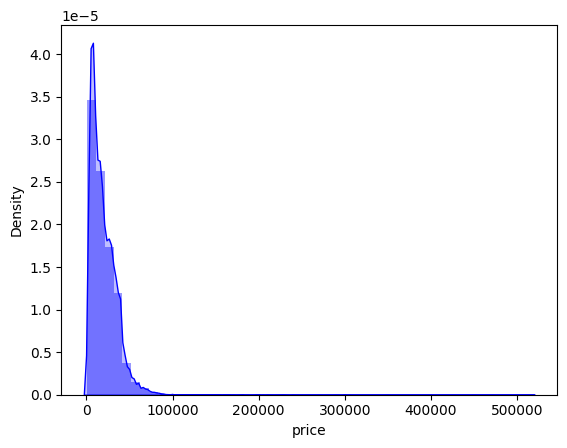

In [10]:

sns.distplot(
    df.price,  
    color = "blue", 
    kde = True,
    kde_kws = {"shade": True, "linewidth": 1});


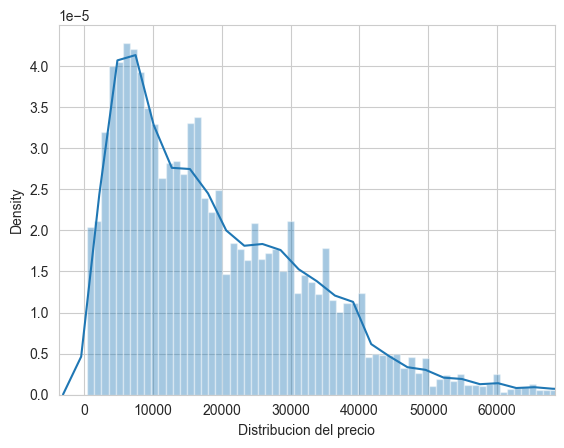

In [11]:

# Configurar estilo de gráfico
sns.set_style('whitegrid')

# Graficar distribución de precios
ax = sns.distplot(df["price"], bins=500)

# Establecer límites del eje x
min_value, max_value = ax.get_xlim()
ax.set_xlim(min_value/8, max_value/8)

# Agregar etiqueta de eje x
plt.xlabel('Distribucion del precio')

# Mostrar gráfico
plt.show()


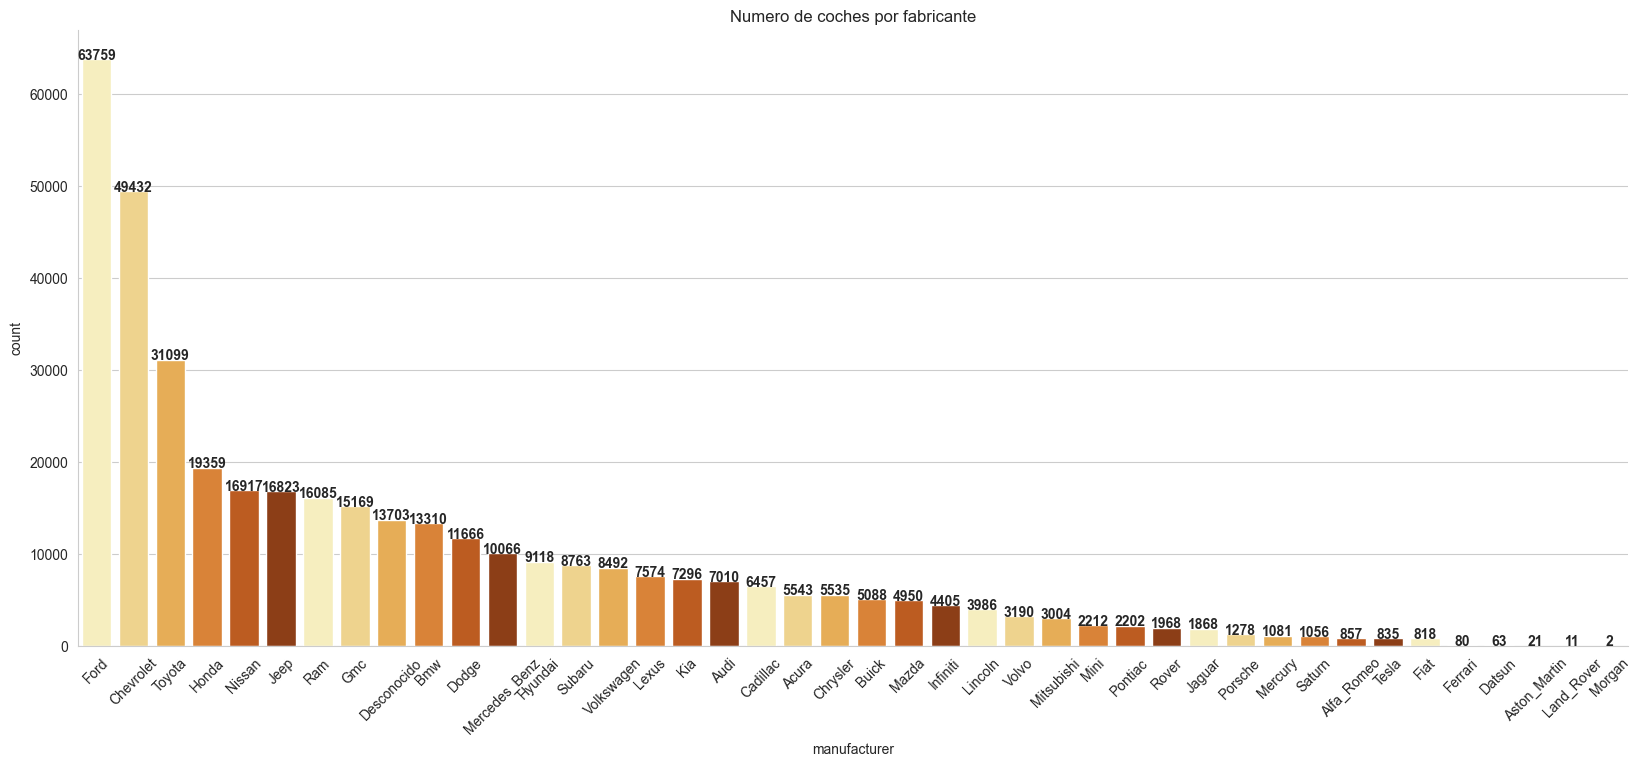

In [12]:
plt.figure(figsize =(20,8)) # para establecer el tamaño de la gráfica
fig = sns.countplot(data = df, x = "manufacturer",  
                    palette=sns.color_palette("YlOrBr"), 
                    order = df["manufacturer"].value_counts().index) 
plt.xticks(rotation=45) # para girar las etiquetas del eje-x
plt.title("Numero de coches por fabricante")

ejex = df["manufacturer"].value_counts().index.tolist()
ejey = df["manufacturer"].value_counts().values.tolist()

for valor, etiqueta in zip(range(len(ejex)), ejey):
    fig.annotate(etiqueta, # el valor que queremos poner encima de las barras
                 (valor, etiqueta + 2), # las coordenadas de las posiciones de las etiquetas
                 fontweight = "bold" , # si queremos la letra en negrita
   
                 horizontalalignment='center' ) # para centrar la leyenda en el centro de la barra
# para quitar los ejes de arriba y de la derecha         
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)        

plt.show();

Los vehiculos que disponen de una mayor oferta son Ford y Chevrolet, ambos fabricantes americanos, seguido por toyota y honda, fabricantes extrangeros.

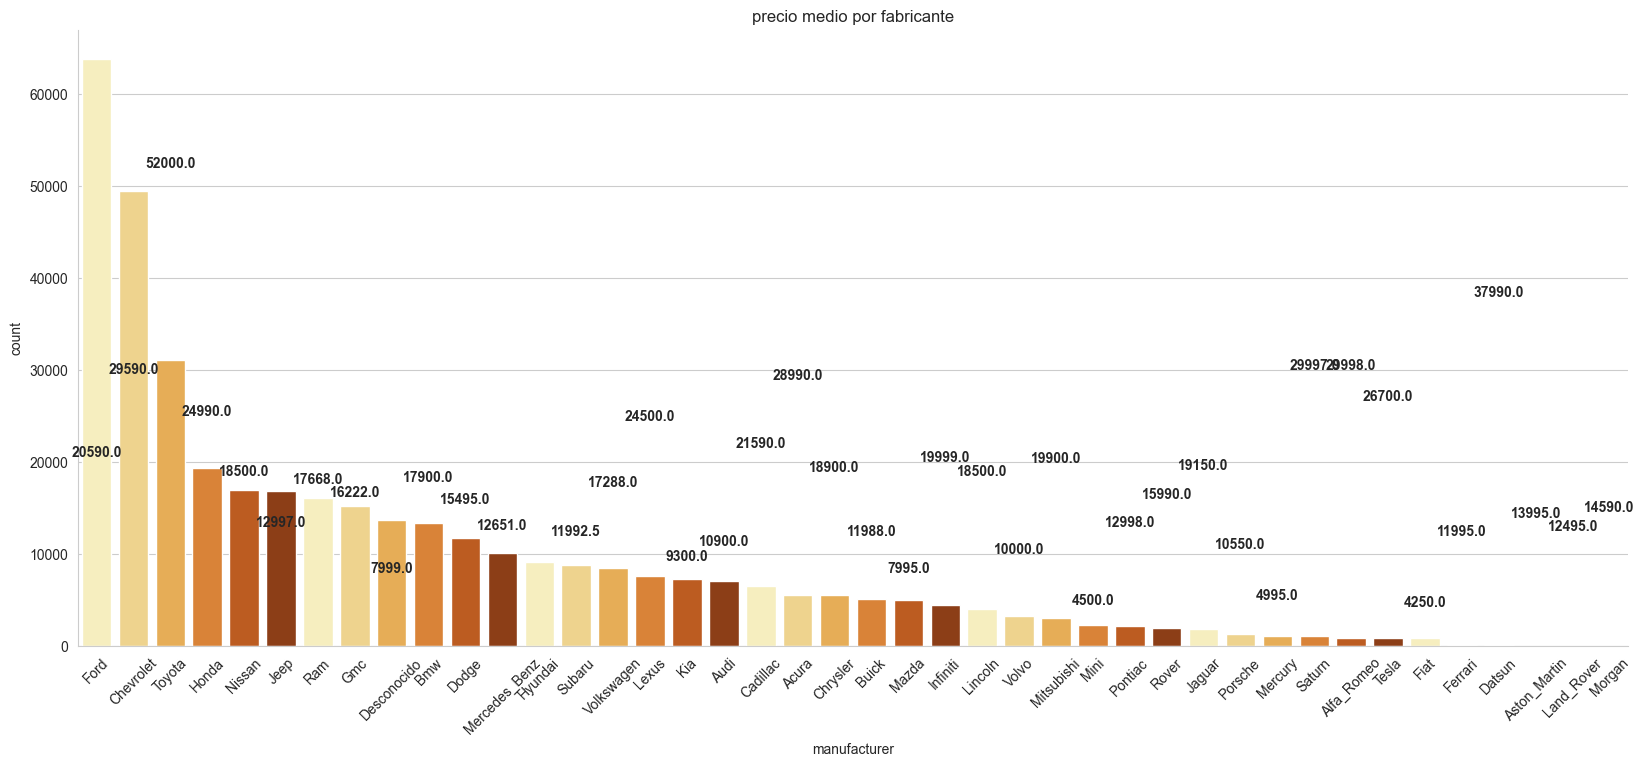

In [13]:
plt.figure(figsize =(20,8)) # para establecer el tamaño de la gráfica
fig = sns.countplot(data = df, x = "manufacturer",  
                    palette=sns.color_palette("YlOrBr"), 
                    order = df["manufacturer"].value_counts().index) 
plt.xticks(rotation=45) # para girar las etiquetas del eje-x
plt.title("precio medio por fabricante")

ejex = df["manufacturer"].tolist()
ejey = df.groupby("manufacturer")["price"].median().tolist()

for valor, etiqueta in zip(range(len(ejex)), ejey):
    fig.annotate(etiqueta, # el valor que queremos poner encima de las barras
                 (valor, etiqueta + 2), # las coordenadas de las posiciones de las etiquetas
                 fontweight = "bold" , # si queremos la letra en negrita
   
                 horizontalalignment='center' ) # para centrar la leyenda en el centro de la barra
# para quitar los ejes de arriba y de la derecha         
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)        

plt.show();

## Características mas comunes por marca

In [14]:
df3 = df.groupby("manufacturer")["price"].median()
df3 = pd.DataFrame(df3)
df3 = df3.sort_values("price", ascending= False)
df3.head(10) ## las 10 marcas mas caras


,price
manufacturer,
Ferrari,105000.0
Aston_Martin,52000.0
Tesla,37990.0
Ram,29998.0
Porsche,29997.0
Alfa_Romeo,29590.0
Jaguar,28990.0
Rover,26700.0
Audi,24990.0


In [15]:
# Obtener el modelo más repetido por marca
resultados = df.groupby('manufacturer')['model'].apply(lambda x: x.value_counts().index[0]).reset_index(name='model')
df3 = pd.merge(df3,resultados, on = "manufacturer")
df3.head()


,manufacturer,price,model
0,Ferrari,105000.0,F8 Spider
1,Aston_Martin,52000.0,Rapide AMR
2,Tesla,37990.0,Model S
3,Ram,29998.0,1500
4,Porsche,29997.0,Cayenne


In [16]:
# Obtener el año del modelo más repetido por marca
resultados = df.groupby('manufacturer')['year'].apply(lambda x: x.value_counts().index[0]).reset_index(name='year')
df3 = pd.merge(df3,resultados, on = "manufacturer")
df3.head()

,manufacturer,price,model,year
0,Ferrari,105000.0,F8 Spider,2010.0
1,Aston_Martin,52000.0,Rapide AMR,2017.0
2,Tesla,37990.0,Model S,2019.0
3,Ram,29998.0,1500,2017.0
4,Porsche,29997.0,Cayenne,2011.0


In [17]:
col = df.columns.tolist()
col.remove("price")
col.remove("year")
col.remove("manufacturer")
col.remove("model")
col

['condition',
 'cylinders',
 'fuel',
 'odometer',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state',
 'lat',
 'long']

In [18]:
for i in col:
    resultados = df.groupby('manufacturer')[i].apply(lambda x: x.value_counts().index[0]).reset_index(name= i)
    df3 = pd.merge(df3,resultados, on = "manufacturer")

In [19]:
marcas = df3.copy()
marcas

,manufacturer,price,model,year,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long
0,Ferrari,105000.0,F8 Spider,2010.0,desconocido,8,gas,14548.0,automatic,rwd,convertible,red,CA,45.494265,-122.579192
1,Aston_Martin,52000.0,Rapide AMR,2017.0,desconocido,12,gas,10157.0,automatic,rwd,coupe,white,FL,48.754959,-122.465960
2,Tesla,37990.0,Model S,2019.0,good,desconocido,electric,62588.0,desconocido,rwd,sedan,white,CA,33.779214,-84.411811
3,Ram,29998.0,1500,2017.0,desconocido,8,gas,12302.0,automatic,4wd,pickup,white,CA,47.812470,-122.321640
4,Porsche,29997.0,Cayenne,2011.0,desconocido,6,gas,159937.0,automatic,rwd,SUV,black,CA,44.834600,-91.515900
5,Alfa_Romeo,29590.0,Stelvio,2018.0,good,desconocido,gas,26978.0,desconocido,rwd,hatchback,black,CA,33.779214,-84.411811
6,Jaguar,28990.0,E-PACE,2017.0,good,desconocido,gas,1372.0,desconocido,rwd,sedan,black,CA,33.779214,-84.411811
7,Rover,26700.0,25,2017.0,desconocido,8,gas,49214.0,automatic,4wd,SUV,black,CA,42.777828,-73.748990
8,Audi,24990.0,Allroad,2018.0,good,6,gas,27160.0,automatic,4wd,sedan,black,CA,33.779214,-84.411811
9,Gmc,24500.0,Sierra 1500,2015.0,desconocido,8,gas,15575.0,automatic,4wd,pickup,white,CA,43.182400,-84.112200


Este dataframe proporciona informacion sobre el mercado de las marcas de vehiculos de segunda mano en estados unidos. 
Hay una gran variedad de coches en el mercado, lo que sugiere que hay una amplia oferta y demanda de estos productos. 
La mayoria de los modelos son de entre 2006/2020, menos la marca Datsun que sus  modelos son del año 1982.
Los precios varian mucho segun la marca, modelo,año y estado del vehiculo, por lo que hay una gran variedad de productos segun el presupuesto.
El tipo de combustible mas comun es la gasolina,siendo un reflejo de la preferencia del mercado y las politicas gubernamentales sobre la energia, en USA la gasolina esta subvencionada por el gobierno.
El análisis tambien proporciona la información de que la tracción mas comun es la trasera (RWD) y transmisión automatica. Los vehiculos tipo sedan y SUV son los mas populares. 


## Las caracteristicas mas comunes por estado

In [20]:
estados = df.groupby("state")["price"].median()
estados = pd.DataFrame(estados)
estados = estados.sort_values("price", ascending= False)
estados.head(10) ## las 10 estados  mas caros

,price
state,
WV,25990.0
AK,22988.0
MT,22980.0
WA,20999.0
AL,20590.0
UT,19999.0
HI,19995.0
MO,19990.0
WY,19963.5


In [21]:
col = df.columns.tolist()
col.remove("price")
col.remove("state")

In [22]:
for i in col:
    resultados = df.groupby('state')[i].apply(lambda x: x.value_counts().index[0]).reset_index(name= i)
    estados = pd.merge(estados,resultados, on = "state")

estados

,state,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,lat,long
0,WV,25990.0,2017.0,Ford,Silverado,good,8,gas,156623.0,automatic,4wd,pickup,white,39.630000,-79.940000
1,AK,22988.0,2019.0,Ford,Silverado,desconocido,4,gas,desconocido,automatic,4wd,SUV,white,61.161670,-149.863120
2,MT,22980.0,2017.0,Ford,1500,desconocido,8,gas,100.0,automatic,4wd,truck,white,47.696062,-116.781406
3,WA,20999.0,2017.0,Ford,1500,desconocido,6,gas,desconocido,automatic,4wd,SUV,white,46.234838,-119.128015
4,AL,20590.0,2017.0,Ford,Silverado,good,6,gas,200000.0,automatic,fwd,sedan,white,34.570000,-86.980000
5,UT,19999.0,2017.0,Ford,Aerostar,desconocido,8,gas,180000.0,automatic,4wd,truck,white,43.619740,-116.294690
6,HI,19995.0,2018.0,Toyota,A-Class,desconocido,4,gas,50000.0,automatic,fwd,sedan,white,21.296235,-157.859345
7,MO,19990.0,2017.0,Chevrolet,Silverado,desconocido,6,gas,desconocido,automatic,4wd,SUV,white,38.382623,-93.773440
8,WY,19963.5,2017.0,Ford,F-150,good,8,gas,100000.0,automatic,4wd,sedan,white,33.779214,-84.411811
9,AR,19117.0,2017.0,Chevrolet,Silverado,desconocido,6,gas,411.0,automatic,fwd,SUV,white,38.401800,-93.785000


Este set de datos muestra informacion sobre el mercado de vehiculos de segunda mano dividido por estas.

Una de las conclusiones mas importantes que se pueden sacar, las marcas Ford y Chrevrolet son las mas populares, y sus modelos,F150 y Silverado. Esta información para las fabricas de automóviles, para determinar la popularidad de sus marcas y modelos en el mercado, pudiendo ajustar sus estrategiias de venta y marketing.
Empresas de compra-venta de automoviles puden usar esta información para determinar los precios de venta y compra en diferentes estados.
La informacación del combustible puede ser útil para determinar la demanda y popularidad de diferentes combustibles en distintos estados.

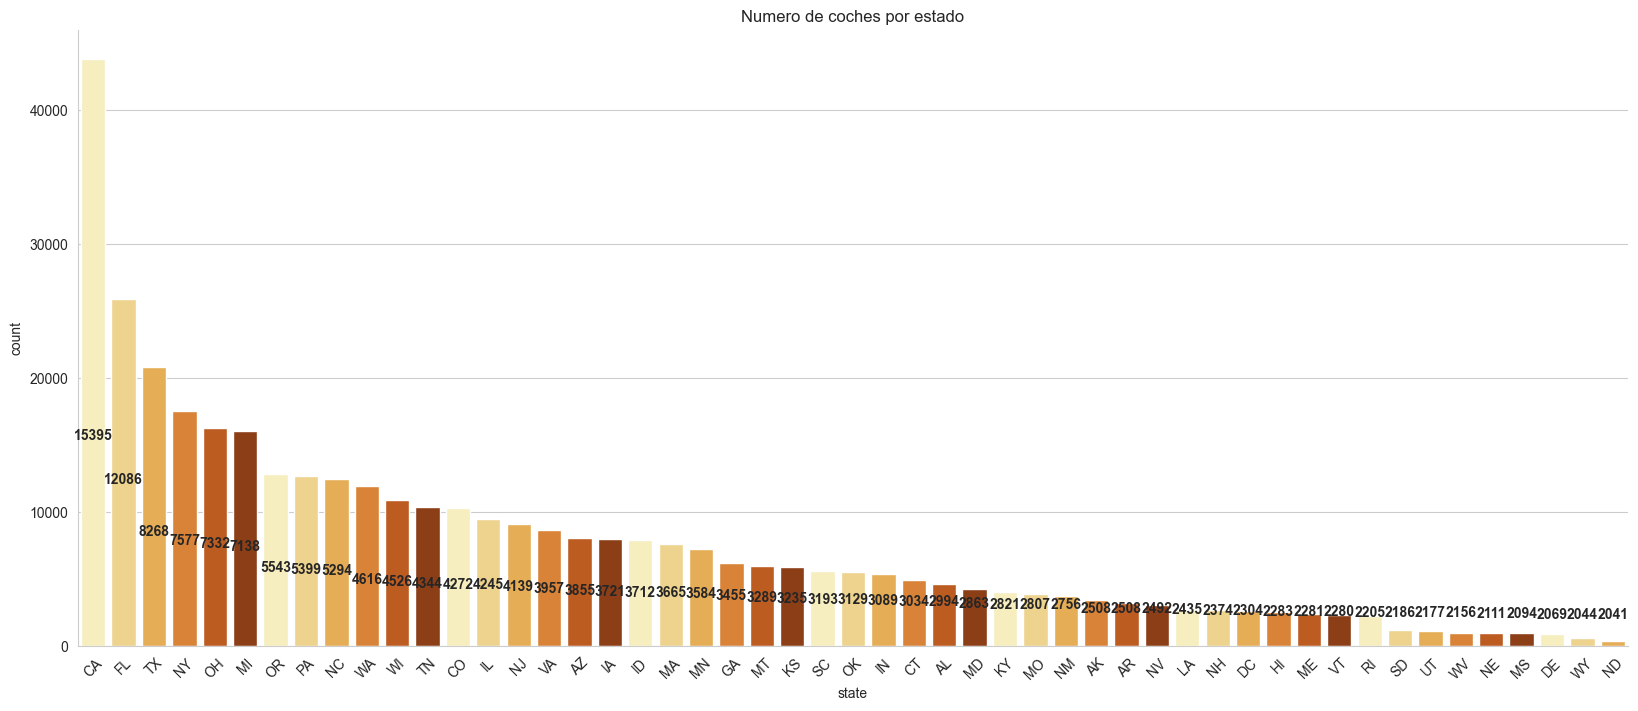

In [23]:
plt.figure(figsize =(20,8)) # para establecer el tamaño de la gráfica
fig = sns.countplot(data = df, x = "state",  
                    palette=sns.color_palette("YlOrBr"), 
                    order = df["state"].value_counts().index) 
plt.xticks(rotation=45) # para girar las etiquetas del eje-x
plt.title("Numero de coches por estado")

ejex = df["state"].value_counts().index.tolist()
ejey = df["model"].value_counts().tolist()

for valor, etiqueta in zip(range(len(ejex)), ejey):
    fig.annotate(etiqueta, # el valor que queremos poner encima de las barras
                 (valor, etiqueta + 2), # las coordenadas de las posiciones de las etiquetas
                 fontweight = "bold" , # si queremos la letra en negrita
   
                 horizontalalignment='center' ) # para centrar la leyenda en el centro de la barra
# para quitar los ejes de arriba y de la derecha         
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)        

plt.show();

In [24]:
años = df.groupby(df["year"])["price"].median().reset_index()
años = años[años["year"] >= "1980.0"]

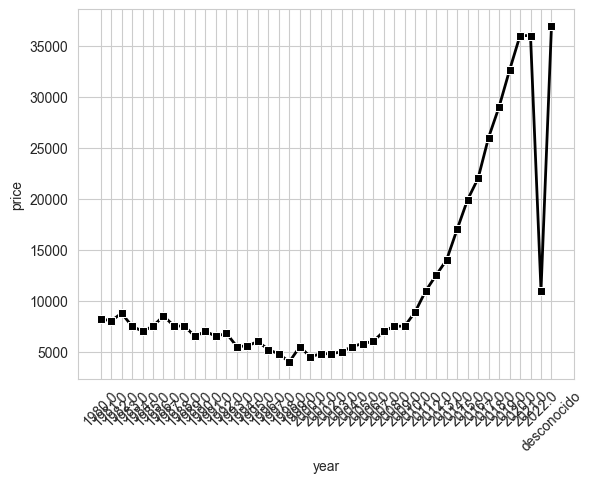

<Figure size 5000x3000 with 0 Axes>

In [25]:
sns.lineplot(data=años, 
             x="year",
             y="price", 
             marker="s", 
             linewidth=2, 
             color="black")
plt.xticks(rotation=45)
plt.figure(figsize=(50,30))
plt.show()


In [26]:
df.columns
categ = ["condition","cylinders","fuel","transmission","drive","type"]

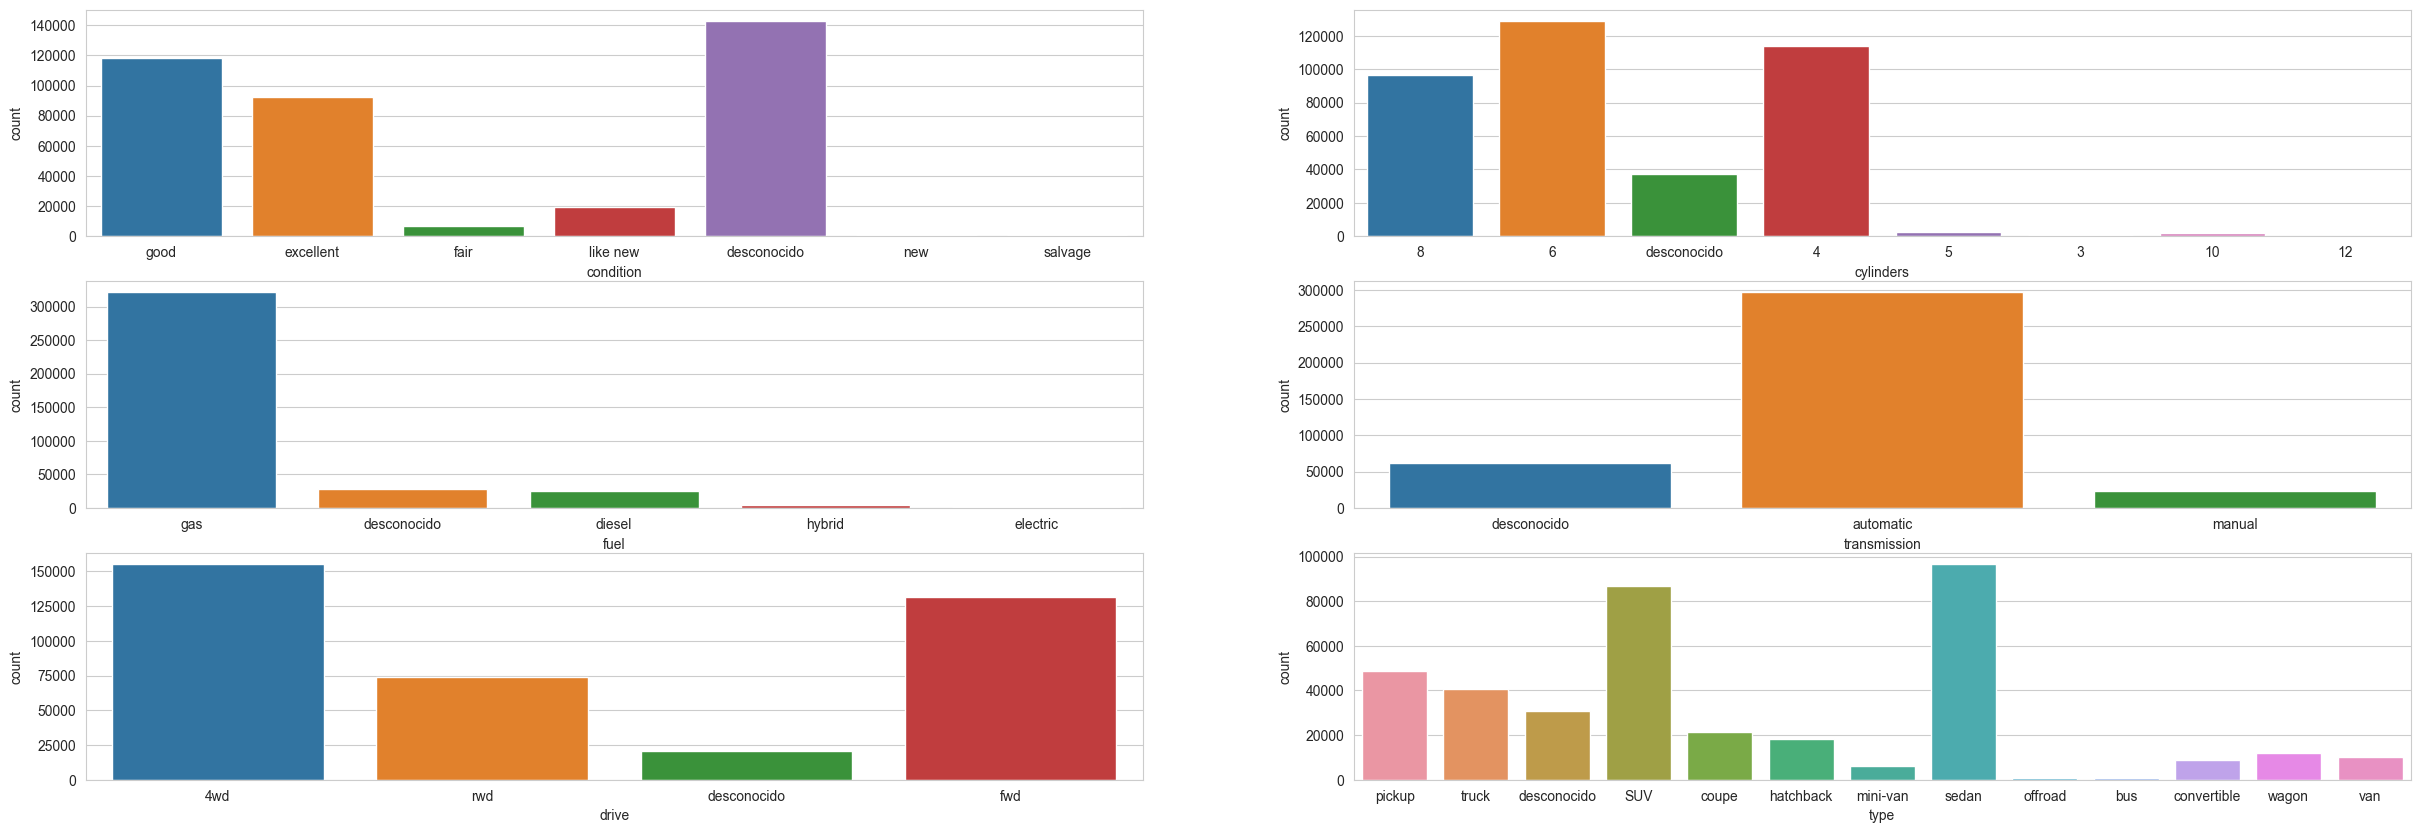

In [27]:
fig, axes = plt.subplots(nrows =3,ncols = 2, figsize = (30,10))
axes = axes.flat
for i , columns in enumerate(categ):
    sns.countplot(data = df,
                  x = columns,
                  ax = axes[i]);

In [28]:
df2= df.copy()

# Reemplazar los valores 'desconocido' por NaN
df2[["year","odometer"]].replace('desconocido', np.nan, inplace=True)
df2["cylinders"].replace('desconocido', np.nan, inplace=True)

In [29]:
df2.dropna(inplace= True)

In [30]:
df2.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64

In [31]:
# Convierte la columna a formato numérico
df2['year'] = pd.to_numeric(df2['year'], errors='coerce')
df2['odometer'] = pd.to_numeric(df2['odometer'], errors='coerce')

# Convierte la columna a formato integer
df2['year'] = df2['year'].astype(int)
df2['cylinders'] = df2['cylinders'].astype(int)
df2['odometer'] = df2['odometer'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

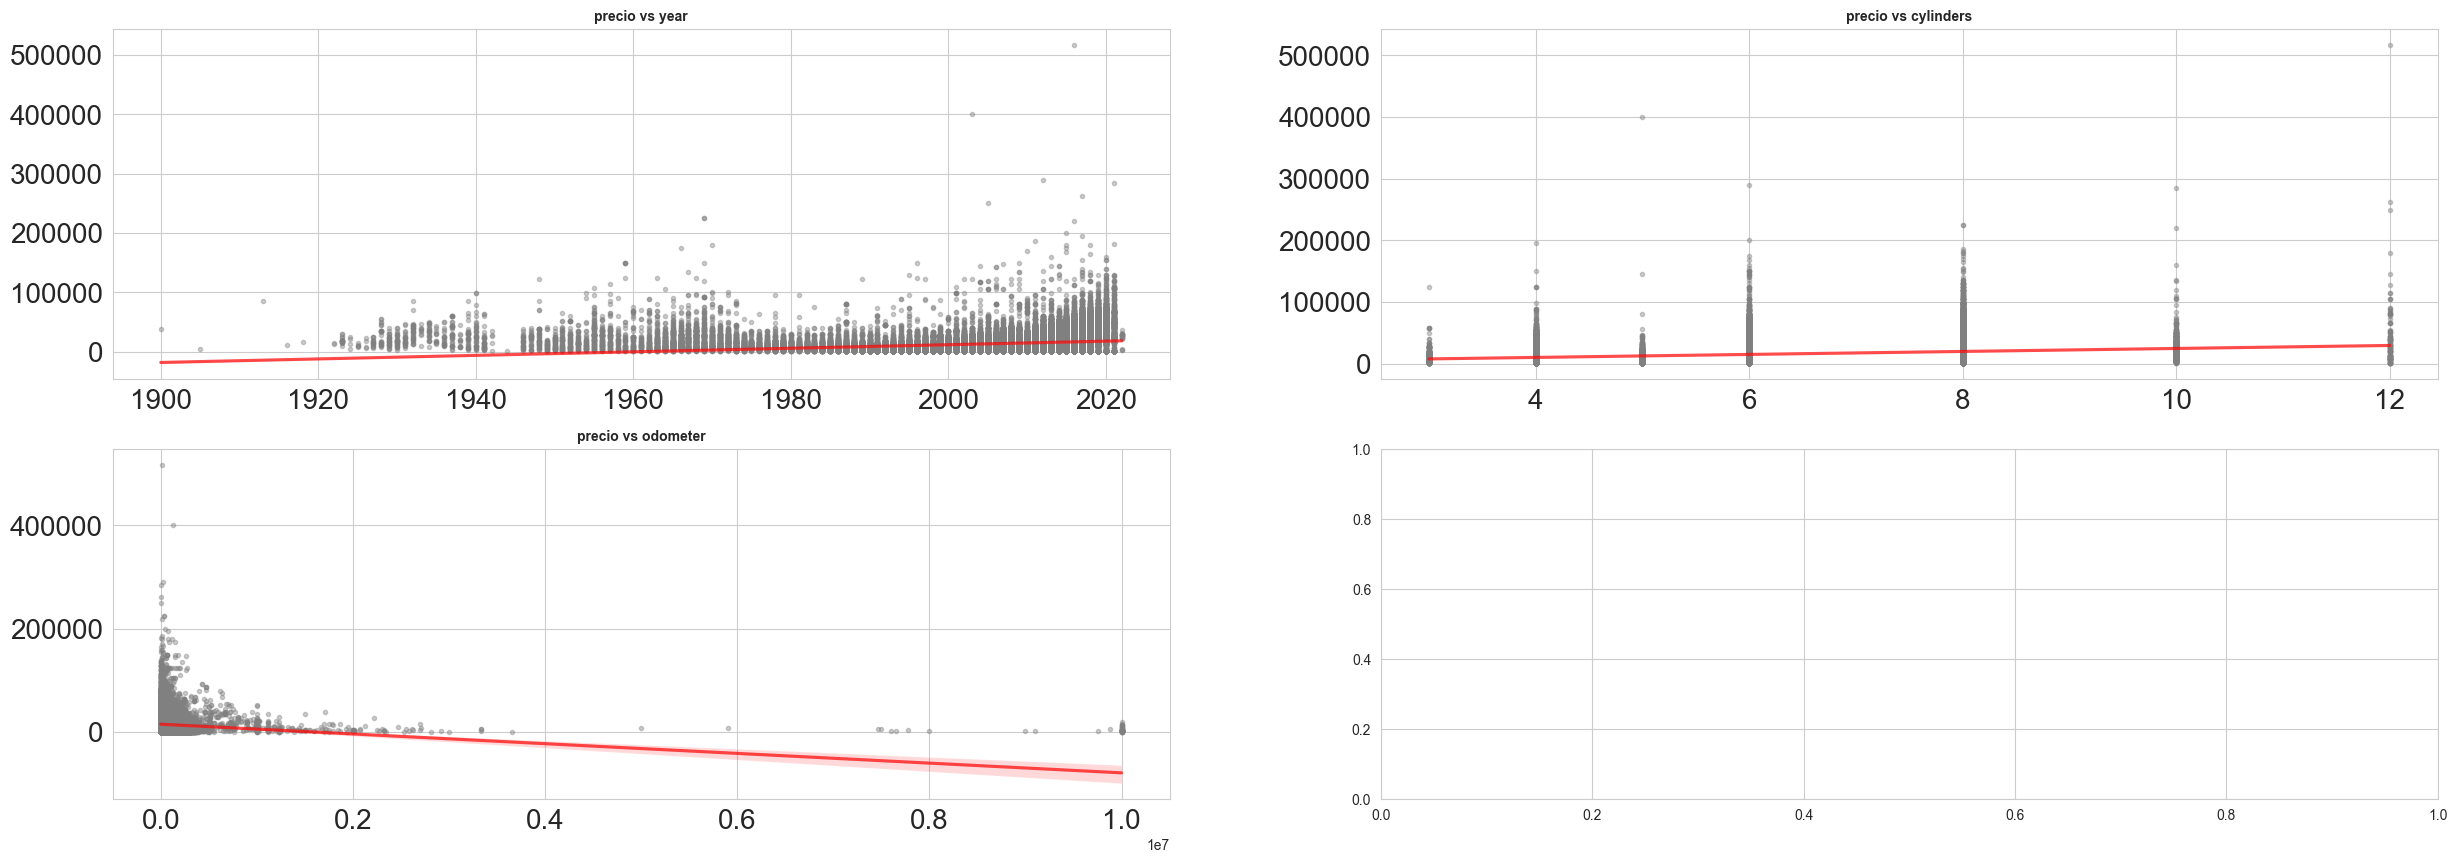

In [ ]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df2.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["price","lat","long"])

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df2[colum], 
        y = df2["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    

Las variables year, cylinders y odometer tienen una realicion directa e influyente en el precio.
Cuanto mas reciente sea el vehiculo, mayor es su precio de venta. Cuantos mas cylindros tiene el motor, es una relacion directa con la potencia del motor, mas precio tiene el vehículo en el mercado. Cuantas mas millas recorridas tiene el vehículo, menor es el precio, al tener un mayor uso es lógico que el precio sea menor.

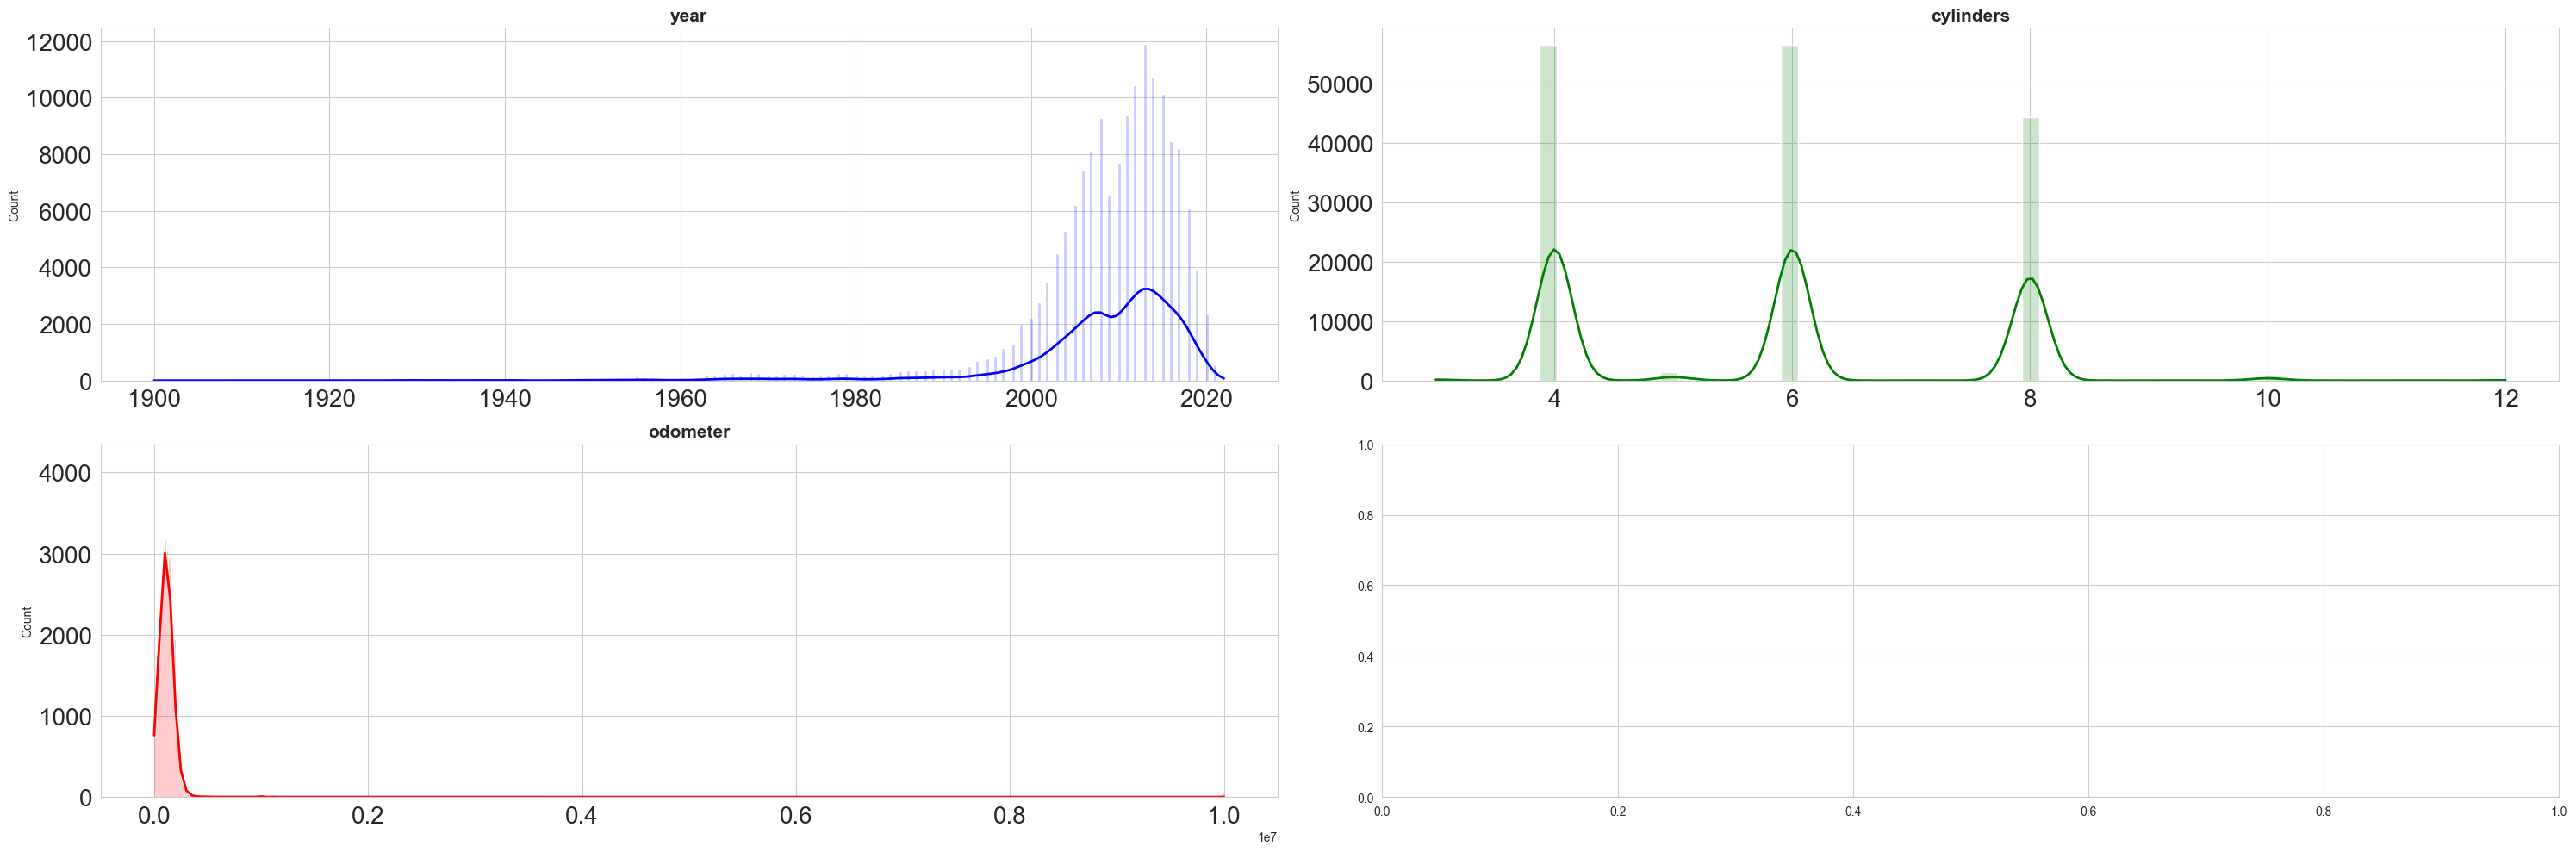

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df2.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["price","lat","long"])

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data = df2,
        x = colum , 
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

In [ ]:

df2.shape

(341965, 15)

In [ ]:
#df2.to_csv("datos/tableau.csv")

In [32]:
gas = pd.read_csv("precio_gasolina.csv")
gas

,Año,Precio del petróleo (USD/barril)
0,1960,2.89
1,1961,2.85
2,1962,2.91
3,1963,2.97
4,1964,2.91
...,...,...
57,2017,50.84
58,2018,64.90
59,2019,57.05
60,2020,39.65


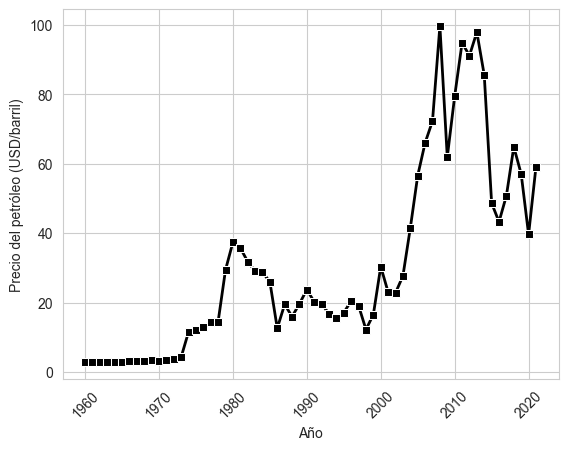

<Figure size 5000x3000 with 0 Axes>

In [33]:
sns.lineplot(data=gas, 
             x="Año",
             y="Precio del petróleo (USD/barril)", 
             marker="s", 
             linewidth=2, 
             color="black")
plt.xticks(rotation=45)
plt.figure(figsize=(50,30))
plt.show()


In [35]:
gas.dtypes


Año                                   int64
Precio del petróleo (USD/barril)    float64
dtype: object

In [39]:
gas.replace(".", ",")

,Año,Precio del petróleo (USD/barril)
0,1960,2.89
1,1961,2.85
2,1962,2.91
3,1963,2.97
4,1964,2.91
...,...,...
57,2017,50.84
58,2018,64.90
59,2019,57.05
60,2020,39.65


In [40]:
gas.to_csv("datos/precio_gasolina.csv")